In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,VotingClassifier,StackingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# measures 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
### load dataset
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test =pd.read_csv('/kaggle/input/titanic/test.csv')

passenger_ID =df_test['PassengerId']

df_train.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_train.duplicated().sum()

0

In [5]:
df_train.shape,df_test.shape

((891, 12), (418, 11))

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

__Observation__ :

```Train```
- Age has 177 null values
-  Cabin has 687 null values
-  Embarked has 2 null values

```Test```
- Age has 86 null values
- Fare has 1 null values
-  Cabin has 327 null values

### Handel Null values 
fill null values with : 
- median for numerical feaures 
- mode for categorical features

In [9]:
full_data=[df_train,df_test]
for df in full_data:
    df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df['Age'] = df['Age'].fillna(df['Age'].median())

In [10]:
## check for duplication 
df_train[df_train.duplicated()].shape,df_test[df_test.duplicated()].shape

((0, 12), (0, 11))

__observation__:
- thier is no duplication on dataset

In [11]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [12]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Feature Engineering

In [13]:
full_data=[df_train,df_test]


for df in full_data:
    # create new feature called family_size
    df['family_size'] = df['SibSp'] + df['Parch'] + 1

   # create new feature called IsAlone
    df['IsAlone'] = 0
    df.loc[df['family_size']==1,'IsAlone' ] =1
    
    df['Farebin']=pd.qcut(df['Fare'],4)  # we used q_cut because we care about datapoints and split it using quantils
    df['Agebin'] = pd.cut(df['Age'].astype(int),5)  # Cut --> we care about range of bins

# create function to extract title name of passenger
def get_title(name):
    title_search=re.search(' ([A-Za-z]+)\.',name)
    if title_search:
        return title_search.group(1)
    return ""

# Create a new feature Title, containing the titles of passenger names
for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)


In [14]:
print(df_train['Farebin'].value_counts())
print(df_train['Agebin'].value_counts())

Farebin
(7.91, 14.454]     224
(-0.001, 7.91]     223
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: count, dtype: int64
Agebin
(16.0, 32.0]     525
(32.0, 48.0]     186
(-0.08, 16.0]    100
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: count, dtype: int64


In [15]:
df_train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [16]:
# Group all non-common titles into one single grouping "Rare"
for dataset in full_data: 
    dataset['Title'] = dataset['Title'].replace (['Dr','Rev','Col','Major','Don','Lady','Sir','Capt','Countess','Jonkheer'],'Rare')
    
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [17]:
# Mapping Title and sex
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare']= 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']= 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare']= 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 
    dataset['Age']=dataset['Age'].astype(int)

In [18]:
df_train['Cabin'].isnull().sum()

687

In [19]:
df_train['Words_Count'] = df_train['Name'].apply(lambda x: len(x.split()))
df_test['Words_Count'] = df_test['Name'].apply(lambda x: len(x.split()))

# Feature that tells whether a passenger had a cabin on the Titanic
df_train['Has_Cabin'] = df_train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)  # if values is nan replace it with 0 else 1
df_test['Has_Cabin'] = df_test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [20]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,IsAlone,Farebin,Agebin,Title,Words_Count,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,0,2,0,"(-0.001, 7.91]","(16.0, 32.0]",1,4,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3,C85,1,2,0,"(31.0, 512.329]","(32.0, 48.0]",3,7,1
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1,NaN,0,1,1,"(7.91, 14.454]","(16.0, 32.0]",2,3,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,3,C123,0,2,0,"(31.0, 512.329]","(32.0, 48.0]",3,7,1
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1,NaN,0,1,1,"(7.91, 14.454]","(32.0, 48.0]",1,4,0


In [21]:
# Feature selection
drop_elements = ['PassengerId','Cabin','Ticket', 'SibSp', 'Parch','Name']
df_train = df_train.drop(drop_elements, axis = 1)
df_train = df_train.drop(['Agebin', 'Farebin'], axis = 1)
df_test  = df_test.drop(drop_elements, axis = 1)
df_test = df_test.drop(['Agebin', 'Farebin'], axis = 1)

In [22]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size,IsAlone,Title,Words_Count,Has_Cabin
0,0,3,1,1,0,0,2,0,1,4,0
1,1,1,0,2,3,1,2,0,3,7,1
2,1,3,0,1,1,0,1,1,2,3,0
3,1,1,0,2,3,0,2,0,3,7,1
4,0,3,1,2,1,0,1,1,1,4,0


In [23]:
df_test.head()

,Pclass,Sex,Age,Fare,Embarked,family_size,IsAlone,Title,Words_Count,Has_Cabin
0,3,1,2,0,2,1,1,1.0,3,0
1,3,0,2,0,0,2,0,3.0,5,0
2,2,1,3,1,2,1,1,1.0,4,0
3,3,1,1,1,0,1,1,1.0,3,0
4,3,0,1,1,0,3,0,3.0,6,0


In [24]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Survived     891 non-null    int64
 1   Pclass       891 non-null    int64
 2   Sex          891 non-null    int64
 3   Age          891 non-null    int64
 4   Fare         891 non-null    int64
 5   Embarked     891 non-null    int64
 6   family_size  891 non-null    int64
 7   IsAlone      891 non-null    int64
 8   Title        891 non-null    int64
 9   Words_Count  891 non-null    int64
 10  Has_Cabin    891 non-null    int64
dtypes: int64(11)
memory usage: 76.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Sex          418 non-null    int64  
 2   Age          418 non-null    int64  
 3   Fare      

### EDA

In [25]:
cols = df_train.columns
cols

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'family_size',
       'IsAlone', 'Title', 'Words_Count', 'Has_Cabin'],
      dtype='object')

In [26]:
for col in cols:
    print(df_train[col].value_counts())
    print('*'*50)

Survived
0    549
1    342
Name: count, dtype: int64
**************************************************
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
**************************************************
Sex
1    577
0    314
Name: count, dtype: int64
**************************************************
Age
1    523
2    188
0    100
3     69
4     11
Name: count, dtype: int64
**************************************************
Fare
2    229
0    223
3    222
1    217
Name: count, dtype: int64
**************************************************
Embarked
0    646
1    168
2     77
Name: count, dtype: int64
**************************************************
family_size
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64
**************************************************
IsAlone
1    537
0    354
Name: count, dtype: int64
**************************************************
Title
1    517
2    185
3    126
4     40
5    

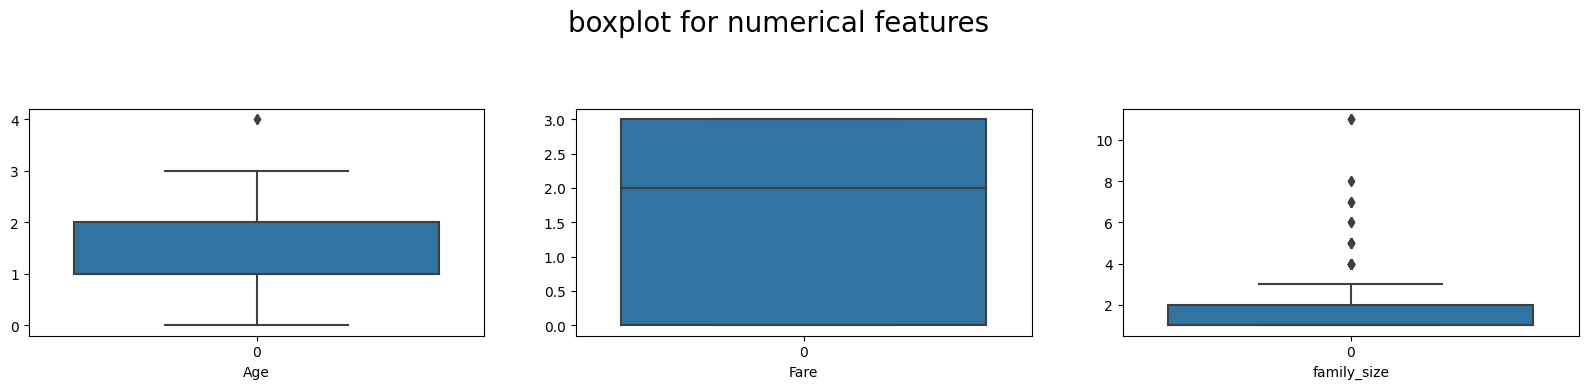

In [27]:
# check if the dataset has the outliers or not 

plt.figure(figsize=(20,10))
plt.suptitle('boxplot for numerical features',size=20)
for i,col in enumerate(['Age','Fare','family_size']):
    plt.subplot(3,3,i+1)
    sns.boxplot(df_test[col])
    plt.xlabel(col)

<Figure size 1000x600 with 0 Axes>

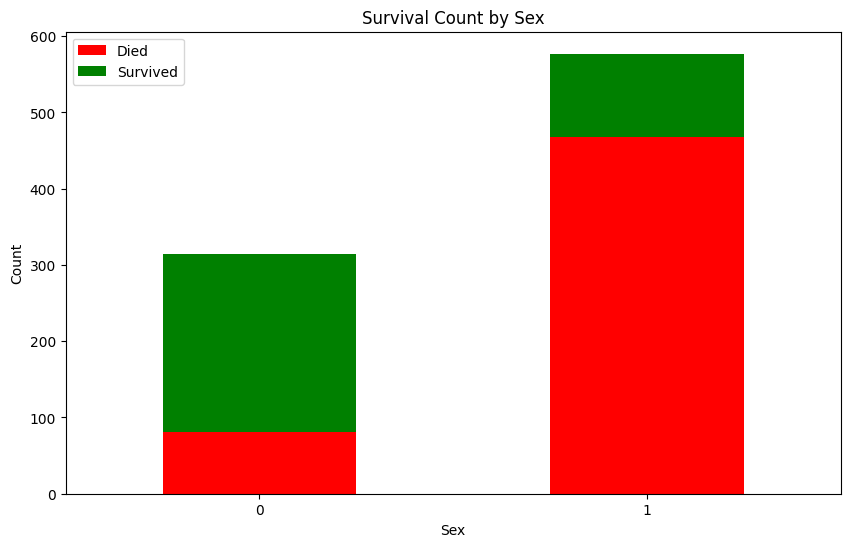

In [28]:
# Grouping data by 'Sex' and 'Survived' to get the counts of survivors and non-survivors
grouped_data = df_train.groupby(['Sex', 'Survived']).size().unstack()

# Plotting the stacked bar chart
plt.figure(figsize=(10,6))
grouped_data.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(10,6))

# Adding labels and title
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Died', 'Survived'])

# Displaying the plot
plt.show()


__Observation__
- number of survived from female > numer of survived from male

<Axes: >

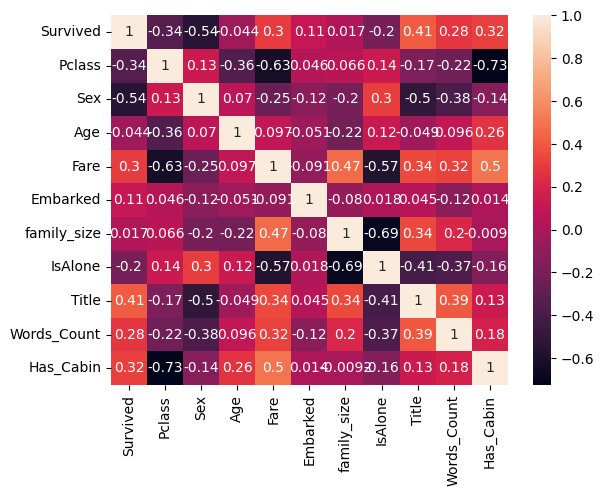

In [29]:
num_cols =df_train.select_dtypes(include=['int64','float64']).columns
sns.heatmap(df_train[num_cols].corr(),annot=True)

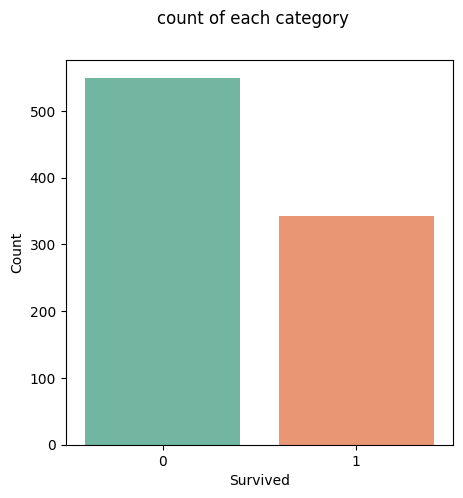

In [30]:
plt.figure(figsize=(5,5))
plt.suptitle('count of each category')
sns.barplot(x=df_train['Survived'],y=df_train['Survived'].value_counts(),data=df,palette="Set2")
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

__Observation__

```the dataset is Imbalanced```
- 549 for class 0  -- not survived
- 332 for class 1  -- survived

In [31]:
df_train.duplicated().sum()

393

In [32]:
df_train.shape,df_test.shape

((891, 11), (418, 10))

### Split Dataset 

In [33]:
# # split dataset into train and valid
X=df_train.drop('Survived',axis=1)
y=df_train['Survived']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp

# Split the remaining 30% into validation and test sets (15% each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape,y_test.shape

((623, 10), (134, 10), (134, 10), (623,), (134,), (134,))

## Models For Classification

### LogisticRegression

In [34]:
LR =LogisticRegression( random_state=42)

# Train Model
LR.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [35]:
y_pred_train= LR.predict(X_train)
y_pred_val =LR.predict(X_val)
y_pred_test =LR.predict(X_test)

In [36]:
print(f'classification report on train      :\n {classification_report(y_train,y_pred_train)}')
print('=' * 50)
print(f'classification report on validation :\n {classification_report(y_val,y_pred_val)}')
print('=' * 50)
print(f'classification report on validation :\n {classification_report(y_test,y_pred_test)}')

classification report on train      :
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       392
           1       0.79      0.73      0.76       231

    accuracy                           0.83       623
   macro avg       0.82      0.81      0.81       623
weighted avg       0.83      0.83      0.83       623

classification report on validation :
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        70
           1       0.85      0.78      0.81        64

    accuracy                           0.83       134
   macro avg       0.83      0.83      0.83       134
weighted avg       0.83      0.83      0.83       134

classification report on validation :
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        87
           1       0.69      0.72      0.71        47

    accuracy                           0.79       134
   macro av

__Observation__  :

- Train accuracy = 83%
- validation accuracy = 83 %
- Test accuracy = 79 %

### DecisionTreeClassifier

In [37]:
 # Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Define a parameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],              # Split criteria
    'max_depth': [3, 5, 10],                       # Reduced max depth
    'min_samples_split': [10, 20, 30],              # Increased min samples to split
    'min_samples_leaf': [5, 10, 15],                # Increased min samples in a leaf node
    'max_features': ['sqrt', 'log2', None],        # Number of features to consider
    'ccp_alpha': [0.01, 0.1, 0.2]                  # Increased pruning parameter
}

# Set up GridSearchCV with 5-fold cross-validation
gridS_dt = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

# Fit the model using GridSearchCV
gridS_dt.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", gridS_dt.best_params_)

# Make predictions on train and validation sets
y_pred_train = gridS_dt.best_estimator_.predict(X_train)
y_pred_val = gridS_dt.best_estimator_.predict(X_val)
y_pred_test = gridS_dt.best_estimator_.predict(X_test)

# Display classification reports
print("Classification Report on Training Data:")
print(classification_report(y_train, y_pred_train))
print("Classification Report on Validation Data:")
print(classification_report(y_val, y_pred_val))
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred_test))


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters: {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 10}
Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       392
           1       0.80      0.72      0.76       231

    accuracy                           0.83       623
   macro avg       0.82      0.81      0.82       623
weighted avg       0.83      0.83      0.83       623

Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        70
           1       0.91      0.78      0.84        64

    accuracy                           0.86       134
   macro avg       0.87      0.85      0.86       134
weighted avg       0.86      0.86      0.86       134

Classification Report on Test Data:
              pre

__Observation__  :

- Train accuracy = 83%
- validation accuracy = 86 %
- Test accuracy = 81 %

###  RandomForest Model

In [38]:
# Define the RandomForestClassifier
RF_model = RandomForestClassifier(random_state=42, class_weight='balanced')
 

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [200,300,500],  # Number of trees
    'max_depth': [3, 5,7,10],  # Maximum depth of the tree
    'min_samples_split': [3,5,7],  # Minimum number of samples to split a node
    'min_samples_leaf': [1,2, 4],  # Minimum number of samples at a leaf node
    'max_features': ['sqrt', 0.5],  # Number of features to consider
}
# Set up GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=RF_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Make predictions
y_pred_train = grid_search_rf.predict(X_train)
y_pred_val = grid_search_rf.predict(X_val)
y_pred_test = grid_search_rf.predict(X_test)
# Display classification reports
print("Classification Report on Train Data:")
print(classification_report(y_train, y_pred_train))
print("Classification Report on Validation Data:")
print(classification_report(y_val, y_pred_val))
print("Classification Report on test Data:")
print(classification_report(y_test, y_pred_test))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Classification Report on Train Data:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       392
           1       0.82      0.80      0.81       231

    accuracy                           0.86       623
   macro avg       0.85      0.85      0.85       623
weighted avg       0.86      0.86      0.86       623

Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88        70
           1       0.90      0.81      0.85        64

    accuracy                           0.87       134
   macro avg       0.87      0.86      0.86       134
weighted avg       0.87      0.87      0.87       134

Classification Report on test Data:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        87
           1       0.69      0.77      0.73        47

   

__Observation__  :

- Train accuracy = 86%
- validation accuracy = 87%
- Test accuracy = 80%

### Bagging Calssifier

In [39]:
 # Define BaggingClassifier with a DecisionTreeClassifier base estimator
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=12),
    random_state=12
)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0],
    'bootstrap': [True, False],
    'estimator__max_depth': [5, 10, None],  # Restrict tree depth
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search_b = GridSearchCV(
    estimator=bagging,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'  # Use a suitable metric like 'f1_weighted' if imbalanced
)

# Fit GridSearchCV
grid_search_b.fit(X_train, y_train)

# Make predictions
y_pred_train = grid_search_b.predict(X_train)
y_pred_val = grid_search_b.predict(X_val)
y_pred_test = grid_search_b.predict(X_test)

# Display classification reports
print("Classification Report on Train Data:")
print(classification_report(y_train, y_pred_train))

print("Classification Report on Validation Data:")
print(classification_report(y_val, y_pred_val))

print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred_test))

# Print best parameters
print("Best Parameters from GridSearchCV:", grid_search_b.best_params_)


Fitting 5 folds for each of 1458 candidates, totalling 7290 fits
Classification Report on Train Data:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       392
           1       0.87      0.73      0.79       231

    accuracy                           0.86       623
   macro avg       0.86      0.83      0.84       623
weighted avg       0.86      0.86      0.86       623

Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        70
           1       0.89      0.73      0.80        64

    accuracy                           0.83       134
   macro avg       0.84      0.82      0.83       134
weighted avg       0.84      0.83      0.83       134

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        87
           1       0.78      0.62      0.69        47

  

__Observation__  :

- Train accuracy = 86%
- validation accuracy = 83%
- Test accuracy = 81%

### GradientBoostingCalssifier 

In [40]:
 # Define the model
Grad_bost = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200], 
    'max_depth': [2, 3, 4], 
    'min_samples_split': [10, 20], 
    'min_samples_leaf': [5, 10], 
    'max_features': ['sqrt', 'log2'], 
    'learning_rate': [0.01, 0.05, 0.1], 
    'subsample': [0.7, 0.8, 0.9]
}


# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=Grad_bost, 
    param_grid=param_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=2
)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get best parameters
print("Best Parameters from GridSearchCV:", grid_search.best_params_)

# Predict on train and validation data
y_pred_train = grid_search.best_estimator_.predict(X_train)
y_pred_val = grid_search.best_estimator_.predict(X_val)
y_pred_test = grid_search.best_estimator_.predict(X_test)

# Display classification reports
print("Classification Report on Train Data:")
print(classification_report(y_train, y_pred_train))

print("Classification Report on Validation Data:")
print(classification_report(y_val, y_pred_val))

print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred_test))


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters from GridSearchCV: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 100, 'subsample': 0.9}
Classification Report on Train Data:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       392
           1       0.87      0.75      0.80       231

    accuracy                           0.87       623
   macro avg       0.87      0.84      0.85       623
weighted avg       0.87      0.87      0.86       623

Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        70
           1       0.91      0.78      0.84        64

    accuracy                           0.86       134
   macro avg       0.87      0.85      0.86       134
weighted avg       0.86      0.86      0.86       134

Classification Rep

__Observation__  :

- Train accuracy = 87%
- validation accuracy = 86%
- Test accuracy = 80%

### AdaBoostClassifier

In [41]:
Ada_bost =AdaBoostClassifier(random_state=12)


# AdaBoost parameters
ada_params = {
    'n_estimators': [200,100],
    'learning_rate' : [0.75,0.1]
}

ada_bost_cv =GridSearchCV(Ada_bost,ada_params,cv=5,scoring='accuracy')

ada_bost_cv.fit(X_train,y_train)

y_pred_train =ada_bost_cv.predict(X_train)
y_pred_val =ada_bost_cv.predict(X_val)
y_pred_test =ada_bost_cv.predict(X_test)

# Display classification reports
print("Classification Report on Train Data:")
print(classification_report(y_train, y_pred_train))

print("Classification Report on Validation Data:")
print(classification_report(y_val, y_pred_val))

print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred_test))





Classification Report on Train Data:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       392
           1       0.81      0.74      0.77       231

    accuracy                           0.84       623
   macro avg       0.83      0.82      0.82       623
weighted avg       0.84      0.84      0.84       623

Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        70
           1       0.89      0.80      0.84        64

    accuracy                           0.86       134
   macro avg       0.86      0.86      0.86       134
weighted avg       0.86      0.86      0.86       134

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        87
           1       0.72      0.72      0.72        47

    accuracy                           0.81       134
   macro avg 

__Observation__  :

- Train accuracy = 84%
- validation accuracy = 86%
- Test accuracy = 81%

### XGBClassifer

In [42]:
xgboost = XGBClassifier()
 

param_grid = {
    'n_estimators': [50, 100, 150],    # Reduced number of estimators
    'learning_rate': [0.01, 0.05],     # Lower learning rates
    'max_depth': [3, 4],                # Smaller max depth to prevent overfitting
    'subsample': [0.7, 0.8, 0.9],       # Use smaller subsample
    'colsample_bytree': [0.7, 0.8],     # Lower column sampling
    'gamma': [0, 0.1],                 # Apply minimal regularization
    'alpha': [0.01, 0.1],              # L1 regularization
    'lambda': [0.01, 0.1],             # L2 regularization
    'min_child_weight': [5, 10, 20]     # Conservative tree splitting
}
grid_search_xg = GridSearchCV(
    estimator=xgboost,
    param_grid=param_grid,
    scoring='accuracy', 
    cv=5
)
grid_search_xg.fit(X_train,y_train)

y_pred_train =grid_search_xg.predict(X_train)
y_pred_val =grid_search_xg.predict(X_val)
y_pred_test = grid_search_xg.predict(X_test)

# Display classification reports
print("Classification Report on Train Data:")
print(classification_report(y_train, y_pred_train))

print("Classification Report on Validation Data:")
print(classification_report(y_val, y_pred_val))

print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred_test))




Classification Report on Train Data:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       392
           1       0.86      0.71      0.77       231

    accuracy                           0.85       623
   macro avg       0.85      0.82      0.83       623
weighted avg       0.85      0.85      0.84       623

Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        70
           1       0.89      0.77      0.82        64

    accuracy                           0.84       134
   macro avg       0.85      0.84      0.84       134
weighted avg       0.85      0.84      0.84       134

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        87
           1       0.74      0.66      0.70        47

    accuracy                           0.80       134
   macro avg 

__Observation__  :

- Train accuracy = 85%
- validation accuracy = 84%
- Test accuracy = 80%

### SVC

In [43]:
# Support Vector Classifier parameters 
 
svm = SVC(kernel= 'linear',C = 0.025)

svm.fit(X_train,y_train)

y_pred_train =svm.predict(X_train)
y_pred_val =svm.predict(X_val)
y_pred_test=svm.predict(X_test)

# Display classification reports
print("Classification Report on Train Data:")
print(classification_report(y_train, y_pred_train))

print("Classification Report on Validation Data:")
print(classification_report(y_val, y_pred_val))

print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred_test))


Classification Report on Train Data:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       392
           1       0.77      0.73      0.75       231

    accuracy                           0.82       623
   macro avg       0.81      0.80      0.81       623
weighted avg       0.82      0.82      0.82       623

Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        70
           1       0.85      0.81      0.83        64

    accuracy                           0.84       134
   macro avg       0.84      0.84      0.84       134
weighted avg       0.84      0.84      0.84       134

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84        87
           1       0.71      0.72      0.72        47

    accuracy                           0.80       134
   macro avg 

__Observation__  :

- Train accuracy = 82%
- validation accuracy = 84%
- Test accuracy = 80%

In [44]:
predictions =grid_search_xg.predict(df_test)
output = pd.DataFrame({'PassengerId': passenger_ID, 'Survived': predictions})

output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
